In [3]:
import pickle
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline


In [5]:
def sample_from(vals, step=250):
    return [val for idx, val in enumerate(vals) if idx % step == 0]

def plot_graph(paths, arch_names, start_seeds, end_seeds, image_name="adding-problem-all-rnns", title="Adding problem for sequence length of 200"):
    training_losses = {}

#     line_colors = ["black", "lightblue","grey", "steelblue","#66a3ff"]
#     shade_colors = [ "#ffcc99","#c2f0c2","#ff9999", "#ffccff", "#b3d1ff"]

    line_colors = ['#3B85BC', '#D6352F','#9367BD', '#8B564A']
    shade_colors = ['#c6ddec','#f7d4d5', '#e6dcef', '#e1d3d0']

    for idx,path1 in enumerate(paths):
        random_seeds = np.arange(start_seeds[idx],end_seeds[idx])
        training_losses[arch_names[idx]] = []
        path=""
        for seed in random_seeds:
            path = path1+"/"+str(seed)
            for (dirpath, dirnames, filenames) in walk(path):
                for file in filenames:
                    if file.endswith("RNN_Train_Losses") or file.endswith("LSTM_Train_Losses"):                    
                        with open(path+"/"+file, 'rb') as handle:                        
                            losses_ = pickle.load(handle)
                            training_losses[arch_names[idx]].append(losses_)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    min_losses = {}

    for idx, arch_name in enumerate(arch_names):
        training_losses_np = np.array(training_losses[arch_name])
        training_losses_np = training_losses_np
        print("\n",arch_name, "\nMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*training_losses_np.shape[1])
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(sample_from(np.arange(1,20001)), sample_from(means[:20000]),color=line_colors[idx],label=arch_name)

    ax.legend(fontsize='xx-large')
    plt.title(title, fontsize=15)
    plt.xlabel("Iterations", fontsize=20)
    plt.ylabel("Loss", fontsize=20)
    ax.set(ylim=(0, 1))
    labels = [(item) for item in ax.get_xticklabels()]
    ax.set_xticklabels(["0","0","2.5k","5k","7.5k","10k","12.5k","15k","17.5","20k"])

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15) 

    
    plt.savefig("./images/"+image_name)
    plt.show()


 RNN 
Min loss for 6 evaluation runs:  [4.22097912e-09 6.37925268e-11 6.26698693e-10 2.12284945e-09
 3.55271368e-13 1.56637725e-09]

 expRNN 
Min loss for 6 evaluation runs:  [1.96655492e-09 6.37925268e-11 5.54312152e-10 1.15107923e-10
 9.88444526e-09 1.39280587e-10]

 nnRNN 
Min loss for 6 evaluation runs:  [6.00974317e-07 1.49884909e-06 2.05348420e-06 1.00839179e-06
 1.12993803e-06 4.77744038e-07]

 LSTM 
Min loss for 6 evaluation runs:  [4.05876222e-10 4.70720352e-10 1.84172677e-11 1.75091941e-10
 1.32196476e-09 1.88288141e-09]


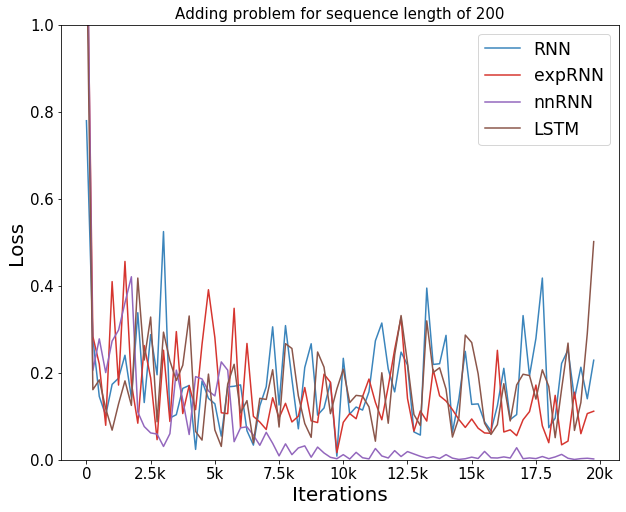

In [8]:
arch_names = ["RNN",  "expRNN", "nnRNN", "LSTM"]
start_seeds = [12840, 12840, 12840, 12840]
end_seeds = [12846, 12846, 12846, 12846]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN',
        './saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN', 
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM']
plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns")


 RNN 
Min loss for 6 evaluation runs:  [0.00833438 0.01325446 0.01376052 0.00702043 0.0127367  0.00981984]

 expRNN 
Min loss for 6 evaluation runs:  [0.00059026 0.00068026 0.00032471 0.00051228 0.00042743 0.00050586]

 nnRNN 
Min loss for 6 evaluation runs:  [4.32377856e-05 3.36186495e-05 3.14981153e-05 2.46509881e-05
 3.12711527e-05 3.47471068e-05]

 LSTM 
Min loss for 6 evaluation runs:  [0.00977443 0.00984651 0.01272135 0.00663702 0.01347096 0.00992896]


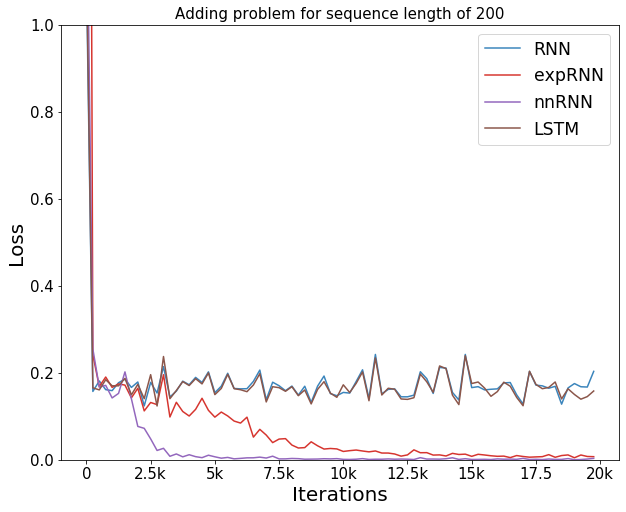

In [7]:
arch_names = ["RNN",  "expRNN", "nnRNN", "LSTM"]
start_seeds = [11840, 11840, 11840, 11840]
end_seeds = [11846, 11846, 11846, 11846]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN',
        './saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN', 
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM']
plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns")


 RNN 
Min loss for 6 evaluation runs:  [0.00656876 0.0149482 ]

 expRNN 
Min loss for 6 evaluation runs:  [0.00051142 0.0006744 ]

 nnRNN 
Min loss for 6 evaluation runs:  [3.47865753e-05 2.47348507e-05]

 LSTM 
Min loss for 6 evaluation runs:  [0.00813529 0.01401586]


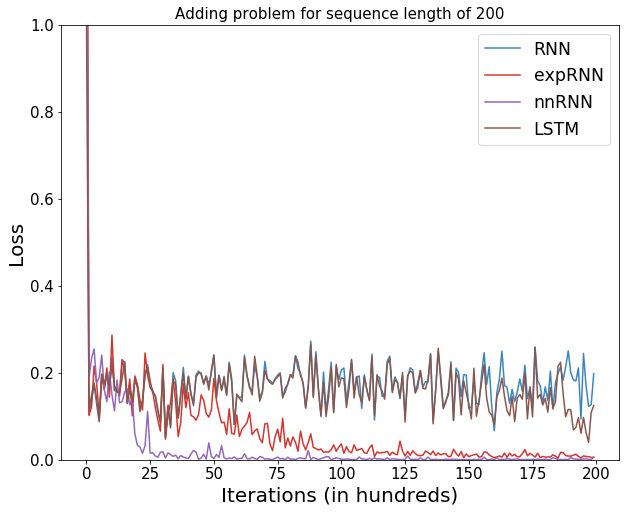

In [10]:
arch_names = ["RNN",  "expRNN", "nnRNN", "LSTM"]
start_seeds = [10840, 10840, 10840, 10840]
end_seeds = [10842, 10842, 10842, 10842]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN',
        './saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN', 
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM']
plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns")


 nnRNN 
Min loss for 6 evaluation runs:  [4.37587987e-05]

 RNN 
Min loss for 6 evaluation runs:  [0.00986191]

 LSTM 
Min loss for 6 evaluation runs:  [7.00819464e-06]


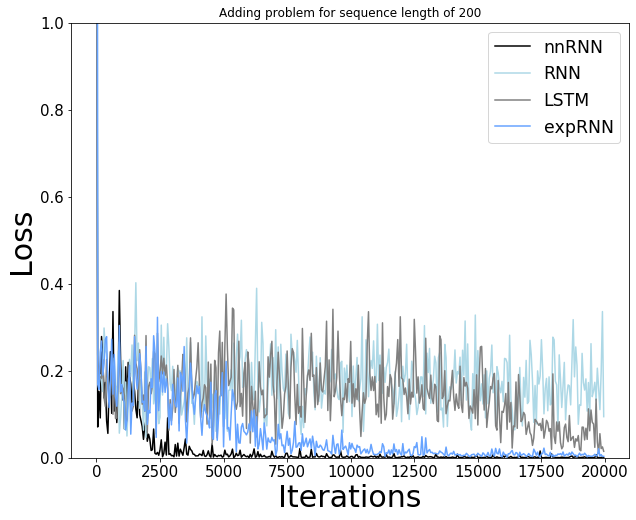

In [204]:
arch_names = ["nnRNN", "RNN", "LSTM"]
start_seeds = [3000, 3000, 2000]
end_seeds = [3001, 3001, 2001]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN',
        './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM']
plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns")

In [208]:
# arch_names = ["nnRNN", "expRNN", "LSTM","RNN"]
# start_seeds = [1040, 1040,1040,1040]
# end_seeds = [1046,1046,1046,1046]
# paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN', 
#          './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN',
#          './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM',
#          './saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN']
# plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns")

In [209]:
# arch_names = ["RNN", "nnRNN", "LSTM", "expRNN"]
# start_seeds = [840,840,840,840]
# end_seeds = [845,845,845,845]
# paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN/', './saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN/',
#          './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM/', './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN/']
# plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns", "Adding problem - Equivalent Hidden Size (nhid = 128)")


In [210]:
# arch_names = ["nnRNN-cayley-init", "nnRNN-henaff-init", "expRNN-henaff-init", "expRNN-cayley-init"]
# start_seeds = [3, 1,1,1]
# end_seeds = [4,3,2,2]
# paths = ['./saves/adding-problem-cayley-init/nnRNN', './saves/adding-problem-henaff-init/nnRNN',
#          './saves/adding-problem-henaff-init/expRNN','./saves/adding-problem-cayley-init/expRNN']
# plot_graph(paths, arch_names, start_seeds, end_seeds)